In [0]:
import os
images_list = os.listdir("--Path---/coil-20-proc")

In [0]:
images_list.sort()

In [0]:
name = []
for imname in images_list:
  name.append(imname[3:6])

In [0]:
final_name=[]
for i in name:
  j = i.split(sep='_')
  final_name.append(int(j[0])-1)



In [7]:
import cv2
import numpy as np
x = []
i=0
for filename in images_list:
  im = cv2.imread('--path--/coil-20-proc/'+filename)
  x.append(np.asarray(im))
  i+=1
  if(i%100==0):
    print("Number {}".format(i))


Number 100
Number 200
Number 300
Number 400
Number 500
Number 600
Number 700
Number 800
Number 900
Number 1000
Number 1100
Number 1200
Number 1300
Number 1400


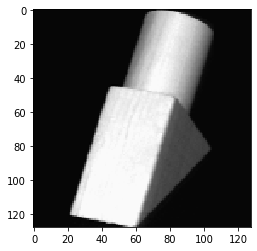

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x[909])

In [9]:
x = np.array(x)
y = np.array(final_name)
print("Lenght of x {}\nLenght of y {}".format(len(x),len(y)))

Lenght of x 1484
Lenght of y 1484


In [0]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from torch import Tensor
from sklearn.model_selection import train_test_split
from torch.optim import Adam
from sklearn.metrics import accuracy_score

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=3)

In [0]:
xtrain =torch.from_numpy(x_train)
ytrain = torch.from_numpy(y_train)
xtest =torch.from_numpy(x_test)
ytest = torch.from_numpy(y_test)
xtrain = xtrain.reshape(len(y_train),3,128,128)
xtest =xtest.reshape(len(y_test),3,128,128)

In [0]:
dataset = TensorDataset(xtrain,ytrain)
dataset_test = TensorDataset(xtest,ytest)
loader = DataLoader(dataset,batch_size = 3)
test_loader = DataLoader(dataset_test,batch_size=3)

In [0]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3,6,4),
        nn.ReLU(),
        nn.BatchNorm2d(6),
        nn.MaxPool2d(3)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(6,8,4),
        nn.ReLU(),
        nn.BatchNorm2d(8),
        nn.MaxPool2d(3)
    )
    self.layer3 = nn.Linear(1152,80)
    self.layer4 = nn.Linear(80,20)
    #self.layer5 = nn.Softmax(dim=1)
  def forward(self,n):
    out = self.layer1(n)
    out = self.layer2(out)
    out = out.view(out.size(0),-1)
    out = self.layer3(out)
    out = self.layer4(out)
    #out = self.layer5(out)
    return out



In [0]:
learning_rate = 0.01
model = CNN()
model.cuda()
criterion = nn.CrossEntropyLoss()
criterion.cuda()
optimizer = Adam(model.parameters(), lr=learning_rate)

In [0]:
total_steps = len(loader)
loss_list = []
acc_list = []
num_epochs=3
total_train=0

In [66]:
for epoch in range(num_epochs):
  acc_list=[]
  base=0
  ll=[]
  for i,(image,label) in enumerate(loader):
    image = image.float()
    outputs = model(image.cuda())
    loss = criterion(outputs,label.cuda())
    loss_list.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_train+=label.size(0)
    base+=label.size(0)
    pred = nn.Softmax(outputs)
    pred = torch.argmax(pred.dim,axis=1)
    accc=accuracy_score(label.cpu(),pred.cpu())
    for i in range(0,len(pred)):
      acc_list.append(pred[i].data.item())
      ll.append(label[i].data.item())
  print("*------------OUTPUT---------------*")
  print("Number of Epoch : {}\nNumber of Step : {}/{}\nTotal Steps : {}\nAccuracy : {}\nAverage Accuracy : {:.2f}".format(epoch,base,total_steps,total_train,accc,accuracy_score(ll,acc_list)*100))
    




*------------OUTPUT---------------*
Number of Epoch : 0
Number of Step : 1113/371
Total Steps : 1113
Accuracy : 0.6666666666666666
Average Accuracy : 58.31
*------------OUTPUT---------------*
Number of Epoch : 1
Number of Step : 1113/371
Total Steps : 2226
Accuracy : 0.6666666666666666
Average Accuracy : 87.24
*------------OUTPUT---------------*
Number of Epoch : 2
Number of Step : 1113/371
Total Steps : 3339
Accuracy : 0.3333333333333333
Average Accuracy : 83.65


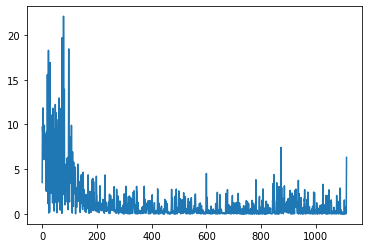

In [67]:
plt.plot(loss_list)

In [69]:
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    acc_list1=[]
    ll1=[]
    for images, labels in test_loader:
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images.float())
        pred = nn.Softmax(outputs)
        pred = torch.argmax(pred.dim,axis=1)
        accc=accuracy_score(labels.cpu(),pred.cpu())
        for i in range(0,len(pred)):
          acc_list1.append(pred[i].data.item())
          ll1.append(labels[i].data.item())
print("Current Accuracy : {:.2f}\nOverall Accuracy of model is {:.4f} %".format(accc*100,accuracy_score(ll1,acc_list1)*100))


Current Accuracy : 100.00
Overall Accuracy of model is 85.9838 %
